# GSOC 2020 DeepLens Project Task-I Solution


Name: K Pranath Reddy

Email: pranath.mail@gmail.com, f20160572@hyderabad.bits-pilani.ac.in
        
Link to my CV: https://drive.google.com/file/d/1G-8YjE_0qPpJa88vHllIz1qUvNjxnnC-/view?usp=sharing&authuser=0

My GitHub Profile: github.com/PyJedi (All my ongoing projects are in private repositories)

## Task I. Simulating Superfluid Dark Matter (DM) with PyAutoLens

**Description:** Modify and/or use the already existing functionality of PyAutoLens to simulate strong lensing from superfluid dark matter. Specifically, you will need to simulate the effects of lensing from a linear mass density - imagine this being a string of mass on galactic scales.

### Solution:

The parameter values have been taken from the deeplens paper (arXiv:1909.07346) ( values corresponding to section VI.A )

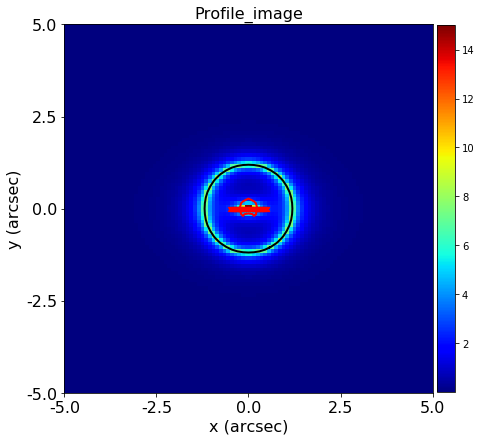

In [2]:
import autolens as al
import autolens.plot as aplt
%matplotlib inline

psf = al.kernel.from_gaussian(shape_2d=(11, 11), sigma=0.1, pixel_scales=0.1)
grid = al.grid.uniform(shape_2d=(100, 100), pixel_scales=0.1, sub_size=2)

# Lens galaxy
lensing_galaxy = al.Galaxy(
    redshift=0.5,
    # Light Profile
    light=al.lp.EllipticalSersic(
        centre=(0.0, 0.0),
        axis_ratio=0.5,
        phi=0.0,
        intensity=1.2,
        effective_radius=0.5,
        sersic_index=2.5,
    ),
    # Dark Matter Halo
    mass=al.mp.SphericalIsothermal(centre=(0.0, 0.0), einstein_radius=1.2
    ), 
    # External Shear
    shear=al.mp.ExternalShear(magnitude=0.0, phi=0.0),
)

galaxies=[lensing_galaxy]

# Linear mass distribution for substructure (string of mass on galactic scales)
for i in range(100):
    galaxies.append(al.Galaxy(
    redshift=1.0,
    mass=al.mp.PointMass(centre=(0.0, -0.5 + 0.01*(i+1)), einstein_radius=0.012), 
    ))

# Source galaxy
lensed_galaxy = al.Galaxy(
    redshift=1.0,
    # Light Profile
    light=al.lp.EllipticalSersic(
        centre=(0.0, 0.0),
        axis_ratio=0.7,
        phi=0.0,
        intensity=0.7,
        effective_radius=0.5,
        sersic_index=1.5,
    ),
)

galaxies.append(lensed_galaxy)

tracer = al.Tracer.from_galaxies(galaxies)
aplt.tracer.profile_image(tracer=tracer, grid=grid)

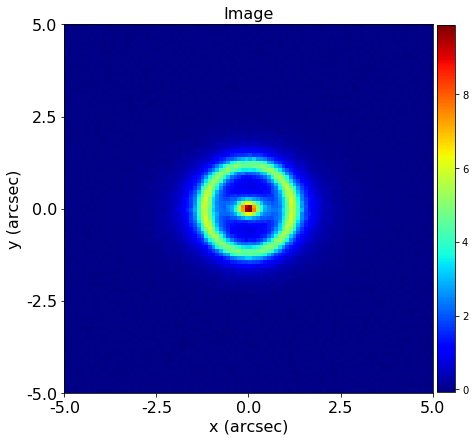

In [3]:
simulator = al.simulator.imaging(
    shape_2d=grid.shape_2d,
    pixel_scales=0.1,
    sub_size=grid.sub_size,
    exposure_time=300.0,
    psf=psf,
    background_level=0.1,
    add_noise=True,
)

imaging = simulator.from_tracer(tracer=tracer)

aplt.imaging.image(imaging=imaging)